# Fraude de cartão de crédito 🤑❌

Este notebook tem como objetivo realizar uma análise sobre os dados originados de uma empresa de varejo e identificar quais são os **fatores que podem influênciar um fraude em cartão de crédito**.


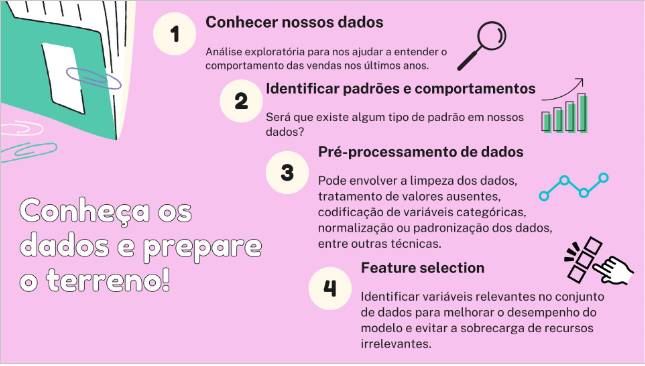

In [ ]:
from IPython.display import Image
Image(filename= "Construindo Modelo Preditivo.PNG")

# Primeiro passo: entender o porblema de negócio.

## Fraude de cartão de crédito

### Fonte de Dados:
https://www.kaggle.com/datasets/dhanushnarayananr/credit-card-fraud?resource=download&select=card_transdata.csv


- Os pagamentos digitais estão evoluindo, mas os criminosos cibernéticos também.

- De acordo com o Data Breach Index, mais de 5 milhões de registros são roubados diariamente, uma estatística preocupante que mostra - a fraude ainda é muito comum tanto para pagamentos do tipo Cartão-Presente quanto Cartão-Não Presente.

- No mundo digital de hoje, onde trilhões de transações com cartões acontecem por dia, a detecção de fraudes é um desafio.


### Explicação do das variáveis:

* **distancefromhome** - a distância de casa onde a transação aconteceu.

* **distancefromlast_transaction** - a distância da última transação aconteceu.

* **ratiotomedianpurchaseprice** - Razão da transação do preço de compra para o preço de compra mediano.

* **repeat_retailer** - É a transação que aconteceu do mesmo varejista.

* **used_chip** - É a transação através de chip (cartão de crédito).

* **usedpinnumber** - A transação aconteceu usando o número PIN.

* **online_order** - A transação é um pedido online.

* **fraude** - A transação é fraudulenta.

## Subindo a base de dados:

Importação de bibliotecas

In [ ]:
import pandas as pd # Para trabalhar com dados tabulares
from sklearn.model_selection import train_test_split #separação dos dados
from sklearn.neighbors import KNeighborsClassifier #modelo de machine learning classificação
from sklearn.metrics import accuracy_score #avaliação do modelo
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay #plot de matriz de confusão
from sklearn.metrics import classification_report #métricas de avaliação
from sklearn.preprocessing import StandardScaler, MinMaxScaler #Feature Engineer
import matplotlib.pyplot as plt #gráficos
import seaborn as sns #gráficos
import numpy as np #transformação dos dados
import warnings #remoção de avisos

In [ ]:
data = pd.read_csv('card_transdata.csv', sep=',') #importando a base de dados em formato csv

In [ ]:
data.head() # analisando os primeiros dados

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [ ]:
data.shape

(1000000, 8)

## Tratando inconsistências na base

In [ ]:
data.isnull().sum() #validação de dados nulos

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

## Análise exploratória dos dados

In [ ]:
data.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: xlabel='fraud', ylabel='count'>

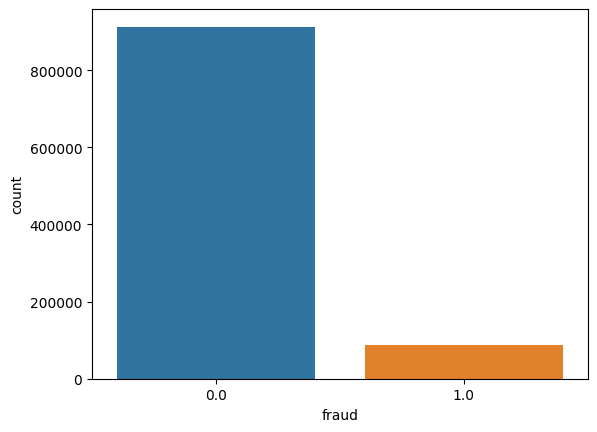

In [ ]:
import seaborn as sns
sns.countplot(x=data['fraud'])

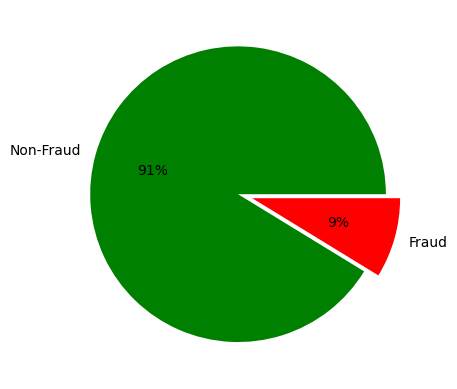

In [ ]:
categories = ["Non-Fraud", "Fraud"]
plt.pie(data["fraud"].value_counts(), labels = categories, autopct = "%.0f%%", explode= (0, 0.1), colors = ("g", "r"))
plt.show()

<Axes: xlabel='online_order', ylabel='count'>

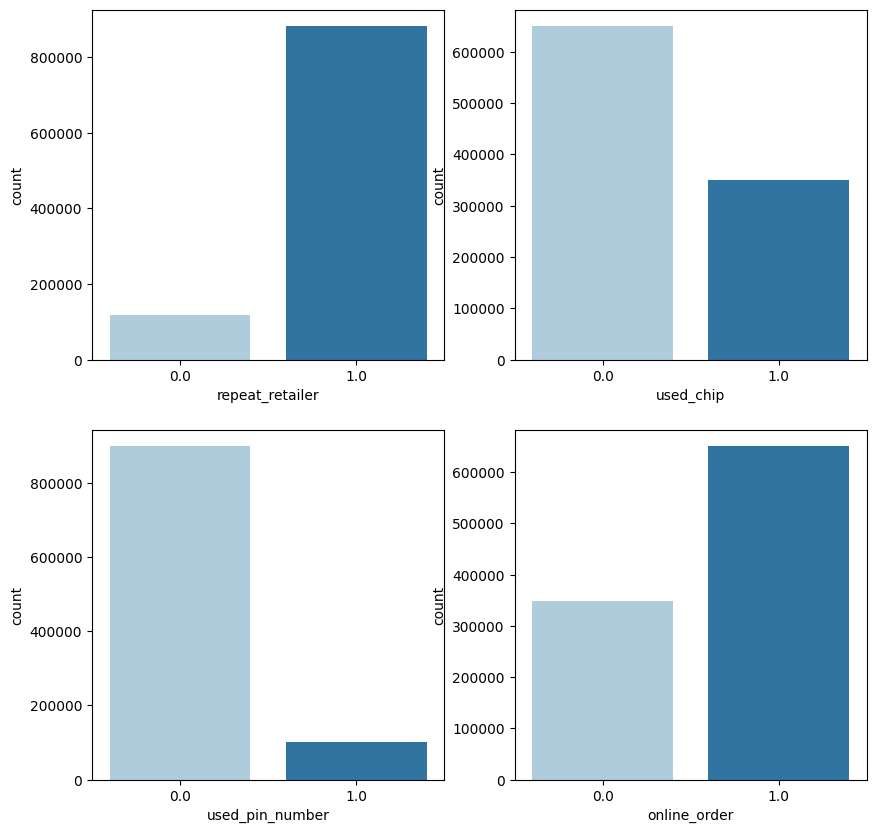

In [ ]:
plt.figure(figsize = (10,10))

plt.subplot(2,2,1)
sns.countplot(x = "repeat_retailer", palette = "Paired", data = data)

plt.subplot(2,2,2)
sns.countplot(x = "used_chip", palette = "Paired", data = data)

plt.subplot(2,2,3)
sns.countplot(x = "used_pin_number", palette = "Paired", data = data)

plt.subplot(2,2,4)
sns.countplot(x = "online_order", palette = "Paired", data = data)

In [ ]:
df_fraud = data[data['fraud'] == 1]
df_no_fraud = data[data['fraud'] == 0]

In [ ]:
df_fraud[["distance_from_home", "distance_from_last_transaction", "ratio_to_median_purchase_price"]].describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price
count,87403.000000,87403.000000,87403.000000
mean,1.237915,0.130606,0.591520
std,0.779902,0.904416,0.483483
min,-1.587590,-3.390062,-1.922037
25%,0.661408,-0.483863,0.544102
50%,1.189047,0.063570,0.705119
75%,2.004795,0.662617,0.865176
max,4.026645,3.334554,2.426006


In [ ]:
df_no_fraud[["distance_from_home", "distance_from_last_transaction", "ratio_to_median_purchase_price"]].describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price
count,912597.000000,912597.000000,912597.000000
mean,0.976246,-0.013801,-0.057543
std,0.584642,0.767471,0.436088
min,-2.312080,-3.927083,-2.356622
25%,0.583079,-0.531861,-0.347011
50%,0.985599,-0.006531,-0.039077
75%,1.383062,0.514359,0.252590
max,3.943353,4.073759,2.427815


<Axes: >

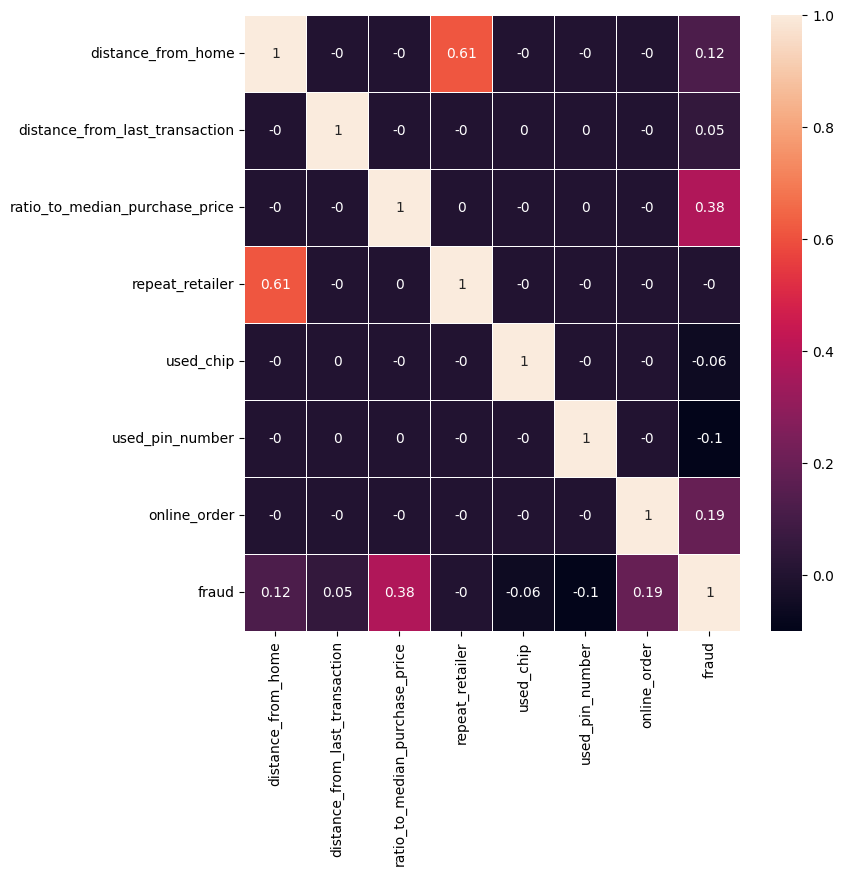

In [ ]:
correlation_matrix = data.corr().round(2)

fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)

## Criação do modelo de Machine Learning

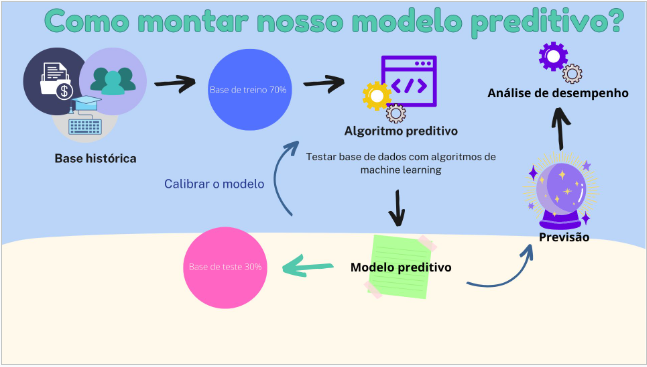

In [ ]:
Image(filename= "Construindo Modelo Preditivo - separação dados.PNG")

### Separação da base de treino e teste

In [ ]:
x = data[['distance_from_home','ratio_to_median_purchase_price', 'online_order', 'repeat_retailer']]
y = data['fraud'] #target

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y,
                                                    random_state=7) #20% for test and 80% for training

### Feature Engineer

Comparação da escala normal das variáveis vs. escalonamento das variáveis

- Comparação do real x dados transformado (normalização e padronização)
* padronização: zera a média e deixa o desvio padrão unitário.( obteremos desvios-padrão menores por meio do processo de normalização minmaxscaler).
* normalização: coloca a variável na escala entre 0 até 1.

- Análise da plotagem real e verificar se está muito diferente da plotagem com standerscaler e minmaxsclaer.
- Escolha o tipo de transformação de escala que melhor se adequa a suas variáveis. Se o desenho do gráfico mudar, você está descaracterizando o dado.

In [ ]:
# Criar o escalonador, passamos apenas os dados de treino
# Se a questão estatística é respeita, não deve fazer diferença
#scaler = StandardScaler() # 0 a 1 # min max: desvio padrão e média
scaler = MinMaxScaler()
scaler.fit(x_train)

MinMaxScaler()

In [ ]:
x_train_escaler = scaler.transform(x_train)
x_test_escaler = scaler.transform(x_test)

In [ ]:
df = pd.DataFrame(x_train_escaler, columns = ['distance_from_home', 'ratio_to_median_purchase_price', 'online_order', 'repeat_retailer'])

In [ ]:
df.head()

,distance_from_home,ratio_to_median_purchase_price,online_order,repeat_retailer
0,0.629379,0.491836,0.0,1.0
1,0.594882,0.640607,1.0,1.0
2,0.442821,0.560971,1.0,1.0
3,0.573488,0.532107,1.0,1.0
4,0.491449,0.389321,1.0,1.0


# O modelo KNN

O algoritmo KNN (K-nearest neighbors) é um algoritmo supervisionado de classificação que basicamente **classifica dados com base na distância entre pontos (dados) mais próximos no espaço** (por isso conhecemos como o algoritmo dos vizinhos mais próximos).

O algoritmo funciona da seguinte lógica: Caso a maioria de pontos próximos seja de uma certa classe “x”, o algoritmo entende que essa classe é predominante naquele espaço e atribui essa classe para a entrada de dado a ser prevista. Os algoritmos possuem alguns parâmetros que podem ser configurados durante a criação do modelo para ajustar a lógica do funcionamento do algoritmo. Para o KNN, utilizamos o parâmetro “k” para definir a quantidade de vizinhos


mais próximos considerados durante o processo de classificação. Os resultados previstos dependem de como as características foram escalonadas, como a similaridade foi medida e qual o tamanho em que “k” foi definido.




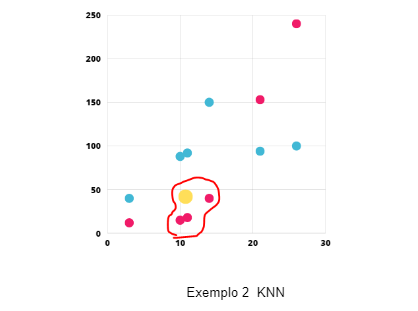

In [ ]:
Image(filename= "KNN.PNG")

Para o algoritmo KNN realizar a classificação dos dados, pode ser utilizado algumas métricas de similaridade (proximidade), que pode ser determinada utilizando uma métrica de distância. A métrica de distância mede quão longe dois registros estão um do outro.

A métrica mais popular é a **distância Euclidiana**. A distância Euclidiana é a distância geométrica clássica que utiliza o Teorema de Pitágoras.
                           Distância Euclidiana: √((x1 – x2)² + (y1 – y2)²).

### Validando o número de Ks:

In [ ]:
error = []

# Calculating error for K values between 1 and 10
for i in range(1, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

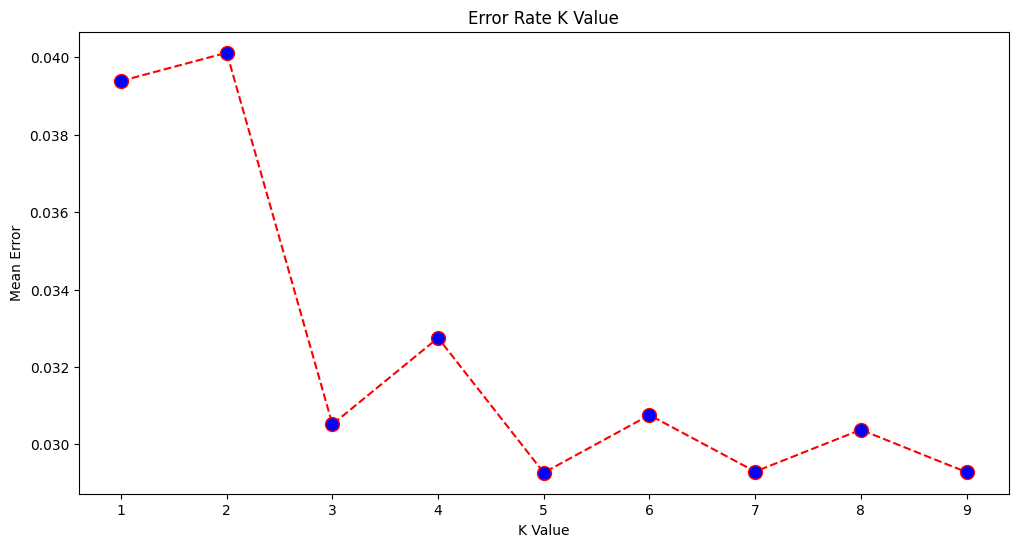

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 10), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

### Configurando o modelo

In [ ]:
model = KNeighborsClassifier(n_neighbors=3)

In [ ]:
model.fit(x_train_escaler, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_predict = model.predict(x_test_escaler)

# Validando o modelo


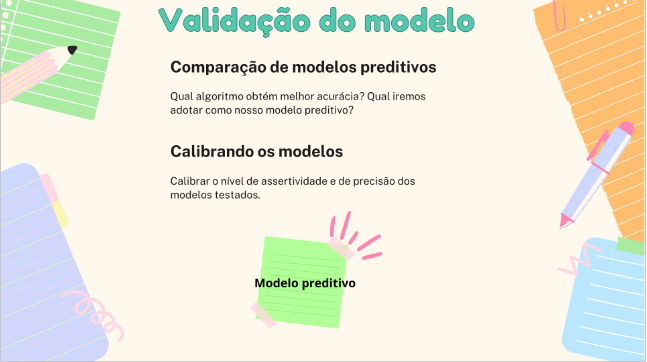

In [ ]:
Image(filename= "Validando o modelo.PNG")

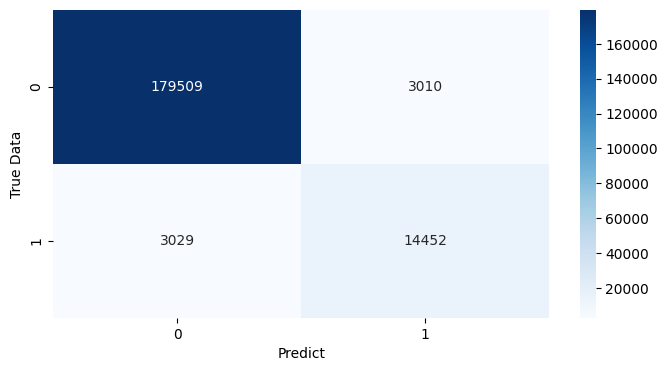

In [ ]:
confusion_matrix_plot = confusion_matrix(y_test, y_predict)
plt.figure(figsize = (8, 4))
sns.heatmap(confusion_matrix_plot, annot = True, fmt="d",cmap = "Blues")
plt.xlabel("Predict");
plt.ylabel("True Data");

In [ ]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98    182519
         1.0       0.83      0.83      0.83     17481

    accuracy                           0.97    200000
   macro avg       0.91      0.91      0.91    200000
weighted avg       0.97      0.97      0.97    200000



In [ ]:
from joblib import dump, load
dump(model, 'modelo_knn.joblib')

['modelo_knn.joblib']

## Testando com novos dados

In [ ]:
def min_max_scale_dataframe(input_df):
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(input_df)
    scaled_df = pd.DataFrame(scaled_data, columns=input_df.columns)

    return scaled_df

In [ ]:
df_teste = pd.read_excel("df_teste.xlsx")

In [ ]:
df_predicoes_escalonado = min_max_scale_dataframe(df_teste)
previsoes = model.predict(df_predicoes_escalonado)
df_resultado_predicoes = df_teste
df_resultado_predicoes['Previsões'] = previsoes
df_resultado_predicoes.head()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


,distance_from_home,ratio_to_median_purchase_price,online_order,repeat_retailer,Previsões
0,45.09,5.40,1,1,0.0
1,33.66,1000.52,1,1,1.0
2,10.00,34.77,0,0,0.0
